# Introdução

#### Aluna: Júlia Roberta Quoos Alves 
#### Conjunto de dados: Buzz in social media Data Set
#### Data: 10/05/2023

In [ ]:
# Instalação e importação das bibliotecas 
#pip install pycaret

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Importação do Conjunto de dados 1: Online Shoppers Purchasing Intention Dataset Data Set
dados = pd.read_csv('Twitter.data', sep=',')
dados

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
0,0,2,0,0,1,1,1,0,1,0,...,1.000000,1.000000,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.000000,1.000000,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.000000,1.000000,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.000000,1.000000,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.000000,1.000000,0,1,0,0,1,2,3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583245,1289,1228,1343,1999,1789,1643,1626,582,487,506,...,1.143549,1.185776,1300,1240,1352,2006,1797,1651,1631,2120.0
583246,1228,1343,1999,1789,1643,1626,2582,487,506,752,...,1.185776,1.217879,1240,1352,2006,1797,1651,1631,2584,1490.0
583247,1343,1999,1789,1643,1626,2582,1649,506,752,663,...,1.217879,1.230072,1352,2006,1797,1651,1631,2584,1656,1407.5
583248,1689,1468,0,1721,1699,1565,1688,618,610,0,...,1.129936,1.100945,1702,1478,0,1722,1702,1570,1694,1465.5


In [3]:
# ATENÇÃO: a base é muito grande e meu computador não roda os algoritmos, então diminuí a base
dados = dados[0:5000]

In [4]:
dados.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
count,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,90.09000,89.431000,104.44060,119.308800,136.452200,153.137600,154.502000,59.067400,58.512400,68.866400,...,1.072260,1.073280,90.342400,89.671600,104.678000,119.574000,136.720600,153.424400,154.808800,131.030200
std,211.29235,213.663054,247.14423,277.802135,311.010689,335.235157,342.887488,152.078881,153.816257,179.459655,...,0.786623,0.754473,211.898522,214.191722,247.603502,278.311895,311.517208,335.750112,343.409707,302.950754
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,3.000000,4.00000,4.000000,5.000000,7.000000,7.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,7.000000,7.000000,5.500000
50%,19.00000,17.000000,21.00000,23.000000,26.000000,31.000000,29.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,19.000000,17.000000,21.000000,23.000000,26.000000,31.000000,29.000000,24.000000
75%,84.00000,79.000000,90.00000,99.000000,109.000000,120.000000,118.250000,51.000000,48.000000,55.000000,...,1.062500,1.061092,84.250000,79.000000,90.000000,99.000000,110.000000,121.000000,119.000000,103.000000
max,2574.00000,2413.000000,3601.00000,2983.000000,3601.000000,3601.000000,3858.000000,1830.000000,2099.000000,2836.000000,...,25.000000,31.000000,2574.000000,2413.000000,3601.000000,2983.000000,3601.000000,3601.000000,3875.000000,3107.000000


## Limpeza dos dados

In [5]:
atributos = ["NCD_0", "AI_0","AS(NA)_0", "BL_0", "NAC_0", "AS(NAC)_0", "CS_0", "AT_0", "NA_0", "ADL_0", "NAD_0"]

In [6]:
db = dados[atributos]
db.describe()

,NCD_0,AI_0,AS(NA)_0,BL_0,NAC_0,AS(NAC)_0,CS_0,AT_0,NA_0,ADL_0,NAD_0
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,90.09000,59.067400,0.000144,0.912923,94.890400,0.000075,0.918000,1.000123,83.468000,1.043333,90.342400
std,211.29235,152.078881,0.000349,0.276801,221.791622,0.000178,0.274392,1.737112,200.036088,1.988754,211.898522
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,2.000000,0.000005,1.000000,3.000000,0.000002,1.000000,1.000000,3.000000,1.000000,3.000000
50%,19.00000,11.000000,0.000027,1.000000,21.000000,0.000014,1.000000,1.000000,18.000000,1.000000,19.000000
75%,84.00000,51.000000,0.000114,1.000000,88.000000,0.000058,1.000000,1.036613,77.000000,1.051282,84.250000
max,2574.00000,1830.000000,0.005398,1.000000,2735.000000,0.002875,1.000000,121.000000,2491.000000,136.000000,2574.000000


In [7]:
db.dtypes

NCD_0          int64
AI_0           int64
AS(NA)_0     float64
BL_0         float64
NAC_0          int64
AS(NAC)_0    float64
CS_0         float64
AT_0         float64
NA_0           int64
ADL_0        float64
NAD_0          int64
dtype: object

In [8]:
db.isnull().sum()

NCD_0        0
AI_0         0
AS(NA)_0     0
BL_0         0
NAC_0        0
AS(NAC)_0    0
CS_0         0
AT_0         0
NA_0         0
ADL_0        0
NAD_0        0
dtype: int64

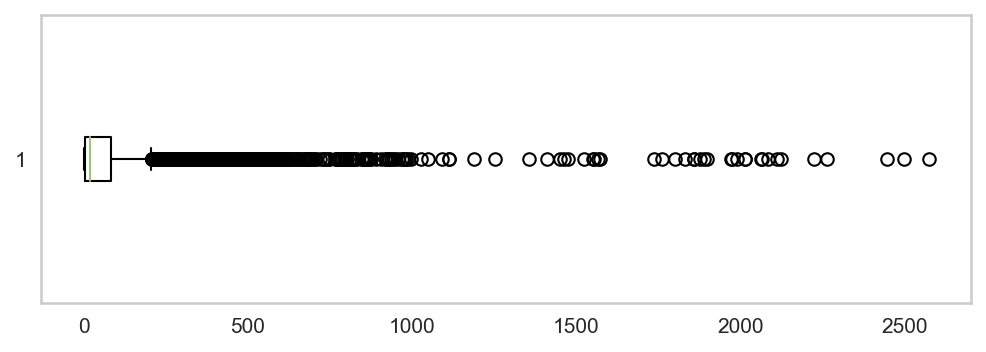

In [9]:
#Verificando a existência de outliers
plt.figure(dpi=150)
plt.subplot(212)
plt.boxplot(db["NCD_0"], vert=False)
plt.grid()
plt.show()

In [10]:
#pegando outliers
outliers =  np.percentile(db["NCD_0"], 99, interpolation='midpoint')
outliers

944.5

In [11]:
#Número de removidos
dadosSuperiores = np.where(db["NCD_0"]>=outliers)
dadosSuperiores[0].shape

(50,)

In [ ]:
#Removendo
#for x in dados:
#    if (dados["NCD_0"][x] >= outliers):
#        dados.drop()

# Classificação

In [12]:
atributos = ["NCD_0", "AI_0","AS(NA)_0", "BL_0", "NAC_0", "AS(NAC)_0", "CS_0", "AT_0", "NA_0", "ADL_0"]
X = db[atributos]
y = db['NAD_0']

In [13]:
treinamento_x, validacao_x, treinamento_y, validacao_y = train_test_split(X, y, test_size = 0.30)

print(treinamento_x)
print(treinamento_y)

      NCD_0  AI_0  AS(NA)_0      BL_0  NAC_0  AS(NAC)_0  CS_0      AT_0  NA_0  \
4466      4     3  0.000065  1.000000      4   0.000040   1.0  1.000000     4   
2985     25    18  0.000083  1.000000     25   0.000039   1.0  1.000000    25   
2044    111    90  0.000174  1.000000    113   0.000089   1.0  1.018018   104   
3475      8     7  0.000015  1.000000     10   0.000008   1.0  1.125000     9   
1137     34    18  0.000051  1.000000     41   0.000033   1.0  1.029412    30   
...     ...   ...       ...       ...    ...        ...   ...       ...   ...   
203       1     1  0.000001  1.000000      1   0.000000   1.0  1.000000     1   
4634      0     0  0.000000  0.000000      0   0.000000   0.0  0.000000     0   
3278    191   158  0.000172  1.000000    192   0.000080   1.0  1.005236   183   
3415     29    11  0.000025  1.000000     29   0.000014   1.0  1.000000    23   
2704   1736   867  0.001631  0.996556   1812   0.000845   1.0  1.037313  1520   

         ADL_0  
4466  1.00

## Algoritmo 1: Naive Bayes

In [14]:
nb = ComplementNB()

In [15]:
nb.fit(treinamento_x, treinamento_y)

predicted = cross_val_predict(nb, treinamento_x, treinamento_y, cv=4)
expected = treinamento_y.values

In [16]:
metricas = ['precision_macro', 'recall_macro']
scores = cross_validate(nb, treinamento_x, treinamento_y, scoring=metricas)
sorted(scores.keys())
print(scores['test_recall_macro'])
print(scores['test_precision_macro'])

[0.00813008 0.00809717 0.00829876 0.00816327 0.00816327]
[0.00469626 0.00467986 0.0047819  0.00471543 0.0046951 ]


In [17]:
predicted = nb.predict(validacao_x)
expected = validacao_y.values

print(confusion_matrix(expected, predicted))
#print(classification_report(expected, predicted))
print(accuracy_score(expected, predicted))

[[120   0   0 ...   0   0   0]
 [  0 144   0 ...   0   0   0]
 [  0  66   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
0.176


## Algoritmo 2: Gradient Boosting Classifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=12)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

In [20]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.075, max_features=2, max_depth=2, random_state=0)

In [ ]:
gb_clf2.fit(X_train, y_train)

In [ ]:
predictions = gb_clf2.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

## Algoritmo 3

In [21]:
clf = LogisticRegression()

In [22]:
lr = clf.fit(X_train, y_train)
lr

LogisticRegression()

In [23]:
clf.score(X_test, y_test)

0.188

In [24]:
y_pred = clf.predict(X_test)

In [25]:
confusion_matrix(y_test, y_pred)

array([[43,  0,  0, ...,  0,  0,  0],
       [ 0, 51,  0, ...,  0,  0,  0],
       [ 0, 21,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.13      1.00      0.22        51
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00         3
          17       0.00    

# Análise dos resultados

In [ ]:
train, test = train_test_split(db, test_size = 0.20)
classificador = setup(data=train, target='NAD_0')
models = compare_models(n_select = 8, sort='AUC')

## Features mais importantes

In [ ]:
# Mostra as features mais importantes do modelo de regressão logística
logisticreg = tune_model(lr)
plot_model(logisticreg, plot='feature')

In [ ]:
plot_model(tuning, plot = 'confusion_matrix')